# Sai Shyam Rajagopalan - 19A2HP427

In [8]:
import pandas as pd # pandas
import numpy as np # numpy
advertising_df = pd.read_csv(r"C:\Users\`\Downloads\OneDrive_1_8-12-2020\Advertising.csv")
# Load the dataset. Type 'r' before your normal string it converts normal string to raw string

In [11]:
advertising_df.info()
# More about the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sno        200 non-null    int64  
 1   TV         199 non-null    float64
 2   Radio      199 non-null    float64
 3   Newspaper  199 non-null    float64
 4   Day        197 non-null    object 
 5   Sales      200 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.5+ KB


In [99]:
type(advertising_df)
# Seeing whether python has understood the data 

pandas.core.frame.DataFrame

In [39]:
# Identifying total number of null values in each column
advertising_df.isnull().sum()

Sno          0
TV           1
Radio        1
Newspaper    1
Day          3
Sales        0
dtype: int64

In [40]:
advertising_df.shape

(200, 6)

In [53]:
# Dropping null values
advertising_df.dropna(how = 'any').shape
advertising = advertising_df.dropna()

In [61]:
x_features = advertising.columns

In [56]:
# Encoding Categorical Variables
advertising

,Sno,TV,Radio,Newspaper,Day,Sales
0,1,230.1,37.8,69.2,Weekend,10.1
1,2,44.5,39.3,45.1,Weekdays,8.0
2,3,17.2,45.9,69.3,Weekdays,10.3
3,4,151.5,41.3,58.5,Weekdays,25.4
4,5,180.8,10.8,58.4,Weekdays,13.6
...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,Weekdays,8.4
196,197,94.2,4.9,8.1,Weekdays,10.8
197,198,177.0,9.3,6.4,Weekdays,15.2
198,199,283.6,42.0,66.2,Holiday,4.8


In [58]:
advertising['Day'].unique()

array(['Weekend', 'Weekdays', 'Holiday'], dtype=object)

In [59]:
pd.get_dummies(advertising['Day'])

,Holiday,Weekdays,Weekend
0,0,0,1
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
195,0,1,0
196,0,1,0
197,0,1,0
198,1,0,0


In [60]:
categorical_features = ['Day']

In [63]:
advertising_encoded = pd.get_dummies(advertising[x_features], columns = categorical_features, drop_first = True) 

In [64]:
advertising_encoded.columns

Index(['Sno', 'TV', 'Radio', 'Newspaper', 'Sales', 'Day_Weekdays',
       'Day_Weekend'],
      dtype='object')

In [65]:
x_features = advertising_encoded.columns

In [113]:
# importing stats model 
import statsmodels.api as sm
# importing sklearn
from sklearn.model_selection import train_test_split
# Splitting the dataset into Train and Test.
X = sm.add_constant(advertising_encoded)
Y = advertising['Sales']
# 70:30 - Train:Test
train_X, test_X, train_y, test_y = train_test_split( X ,Y,train_size = 0.7, random_state = 61 )

TypeError: 'RegressionResultsWrapper' object is not subscriptable

In [83]:
from pandas import Series, DataFrame
import scipy as sp
from scipy import stats

# Building the Model

In [85]:
advertising = sm.OLS( train_y, train_X ).fit()
# Model Fit

In [86]:
print( advertising.params )
# Estimated Parameter Results

const          -2.664535e-14
Sno             2.983724e-16
TV              2.081668e-17
Radio          -8.326673e-17
Newspaper       4.579670e-16
Sales           1.000000e+00
Day_Weekdays   -5.329071e-15
Day_Weekend    -4.440892e-15
dtype: float64


In [87]:
# Model Diagostics
advertising.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.433e+30
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:26:11   Log-Likelihood:                 4726.7
No. Observations:                 157   AIC:                            -9437.
Df Residuals:                     149   BIC:                            -9413.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.665e-14   1.54e-14     -1.725      0.087   -5.72e-14    3.88e-15
Sno           2.984e-16   2.91e-17     10.241      0.000    2.41e-16    3.56e-16
TV            2.082e-17   2.68e-17      0.775      0.439   -3.22e-17    7.39e-17
Radio        -8.327e-17   1.22e-16     -0.680      0.497   -3.25e-16    1.59e-16
Newspaper      4.58e-16   8.79e-17      5.211      0.000    2.84e-16    6.32e-16
Sales            1.0000   3.21e-16   3.12e+15      0.000       1.000       1.000
Day_Weekdays -5.329e-15    1.3e-14     -0.410      0.683    -3.1e-14    2.04e-14
Day_Weekend  -4.441e-15   1.28e-14     -0.346      0.730   -2.98e-14    2.09e-14
==============================================================================
Omnibus:                        2.531   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.282   Jarque-Bera (JB):                2.149
Skew:                          -0.170   Prob(JB):                        0.342
Kurtosis:                       2.538   Cond. No.                     2.73e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
# Python libraries for Visualization

<Figure size 576x432 with 0 Axes>

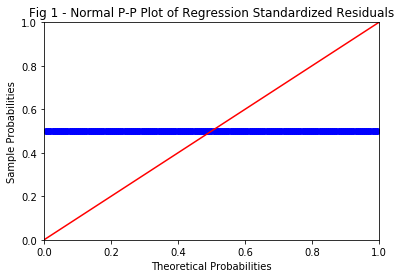

In [91]:
advertising_resid = advertising.resid
probplot = sm.ProbPlot(advertising_resid)
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 1 - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()
#Residual Analysis

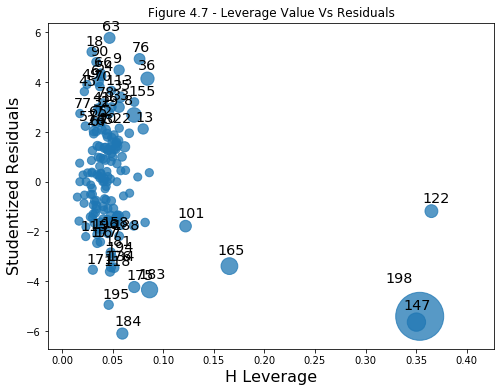

In [101]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( advertising, ax = ax )
plt.title( "Figure 4.7 - Leverage Value Vs Residuals")
plt.show()

# Making Predictions on dataset



In [103]:
pred_y = np.power( advertising.predict( test_X[train_X.columns] ), 2)

# Measuring RMSE

In [104]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(pred_y, test_y))

253.1872871709793

# Measuring R-Squared Value

In [105]:
np.round( metrics.r2_score(pred_y, test_y), 2 )

-1.89